# Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Gathering

In [2]:
df = pd.read_csv("used_device_data.csv")
df.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [6]:
df.shape

(3454, 15)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [4]:
df.describe()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


# Preprocessing

In [5]:
df.isnull().sum()

device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [11]:
df_cleaned = df.dropna()

In [12]:
df_cleaned.shape

(3253, 15)

# Exploratory Data Analysis

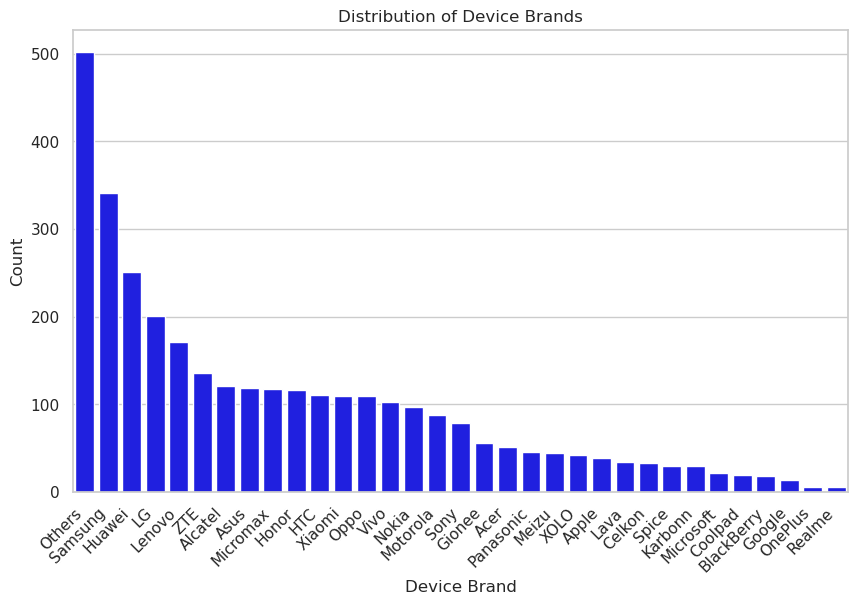

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='device_brand', color='blue', order=df_cleaned['device_brand'].value_counts().index, dodge=False, legend=False)
plt.title('Distribution of Device Brands')
plt.xlabel('Device Brand')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

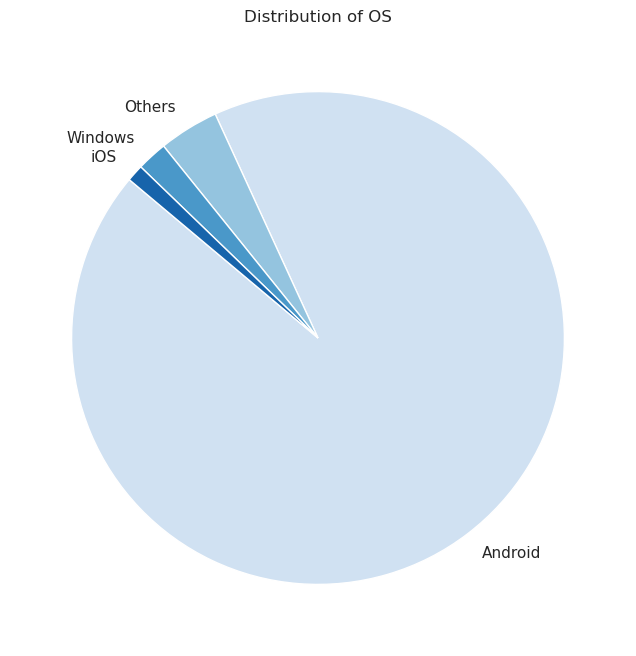

In [41]:
os_counts = df_cleaned['os'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
plt.pie(os_counts, labels=os_counts.index, colors=sns.color_palette("Blues", len(os_counts)), startangle=140)
plt.title('Distribution of OS')
plt.show()

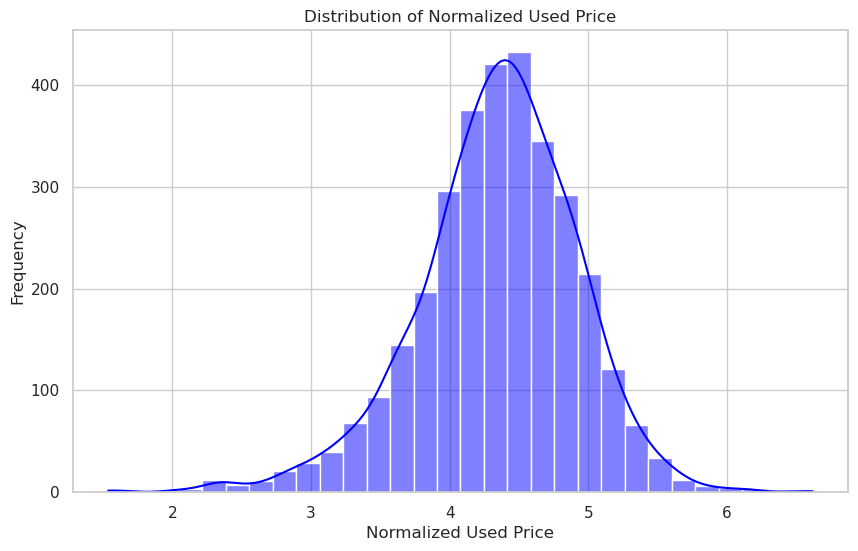

In [42]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['normalized_used_price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Normalized Used Price')
plt.xlabel('Normalized Used Price')
plt.ylabel('Frequency')
plt.show()

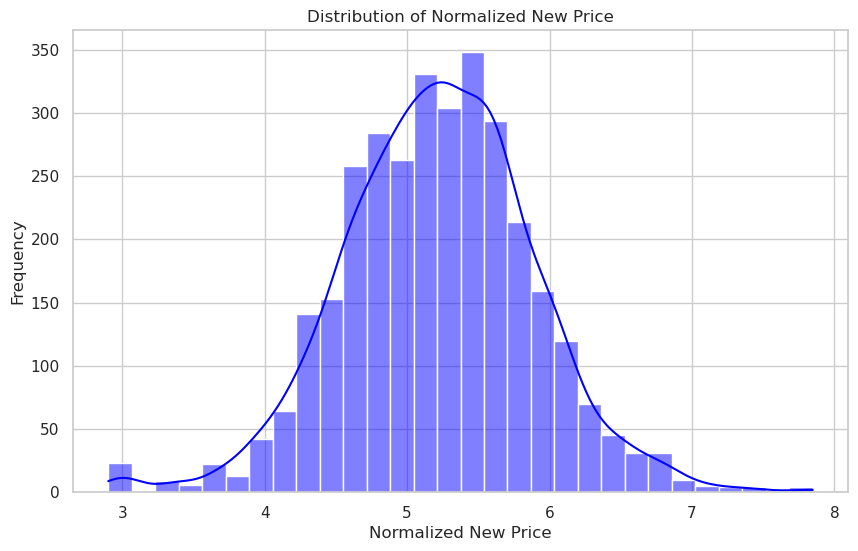

In [43]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['normalized_new_price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Normalized New Price')
plt.xlabel('Normalized New Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
numerical_df = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Plot the pairplot
sns.pairplot(numerical_df, diag_kind='kde', plot_kws={'alpha':0.5, 'color':'blue'})
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

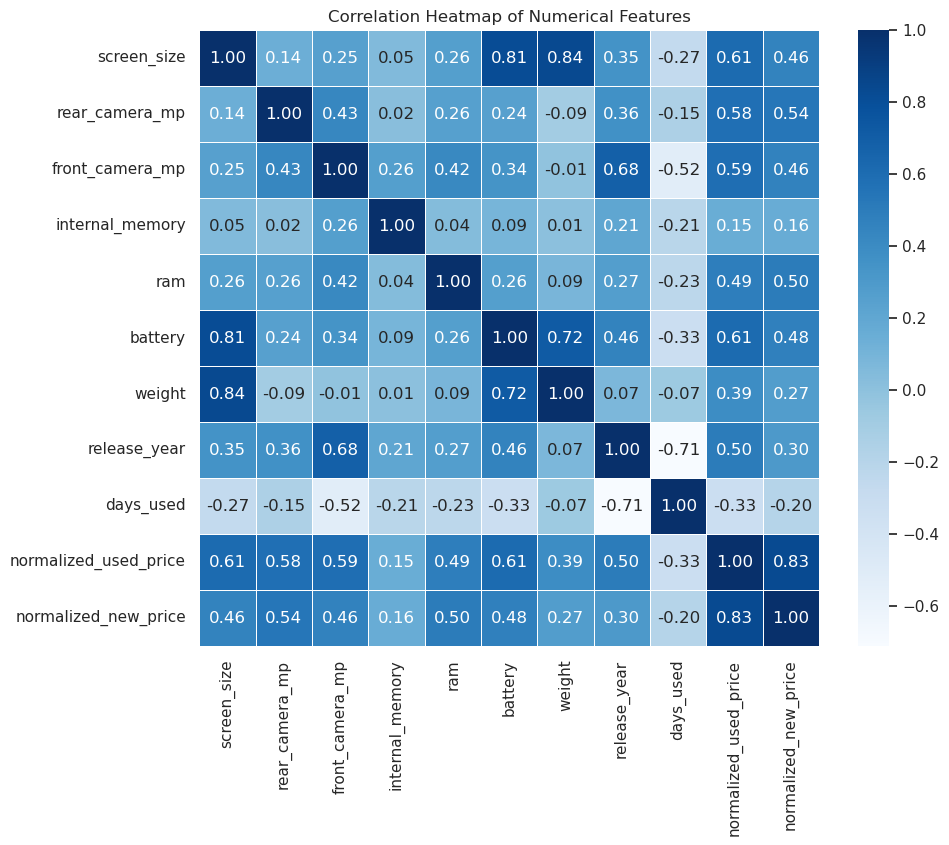

In [44]:
numerical_df = df_cleaned.select_dtypes(include=['float64', 'int64'])
corr_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()